<a href="https://colab.research.google.com/github/RajeshworM/IMPDS_Datafrom_Portal/blob/main/crop_cluster_basmati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

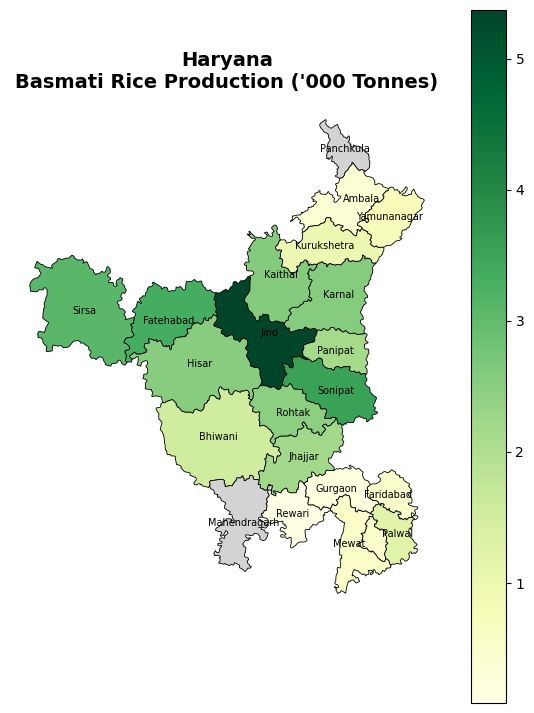

⚠️ No map data for Himachal Pradesh
⚠️ No map data for Jammu & Kashmir


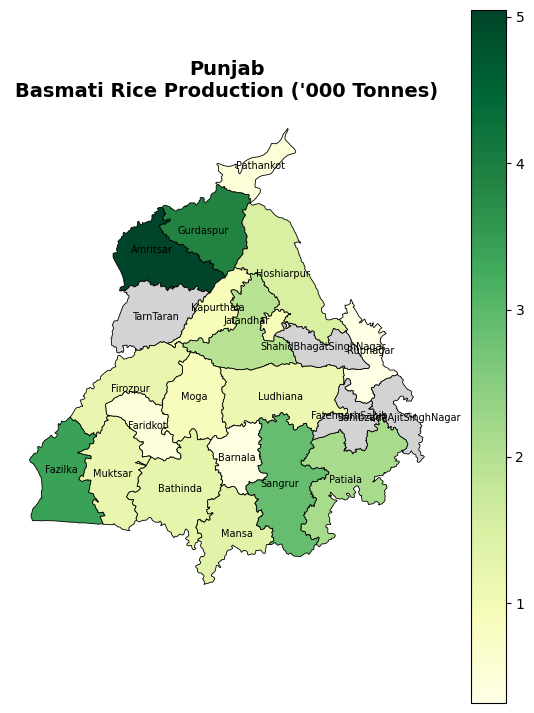

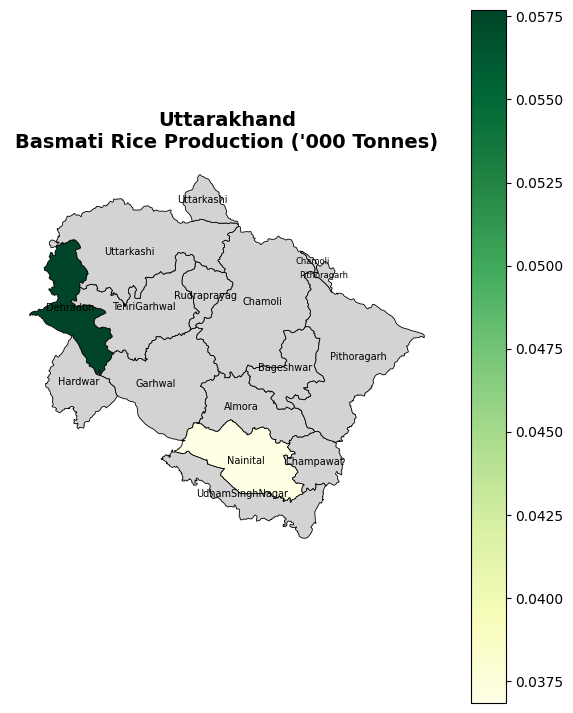

⚠️ No map data for Uttar Pradesh


In [20]:
# ============================================================
# INDIA DISTRICT-LEVEL MAP WITH EXCEL INPUT (RUN-READY)
# ============================================================

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# ------------------ 1. LOAD EXCEL ------------------
excel_path = "cropping.xlsx"   # <-- your corrected Excel file
df = pd.read_excel(excel_path)

df.columns = ["State", "District", "Production"]
df["State"] = df["State"].str.strip()
df["District"] = df["District"].str.strip()

# ------------------ 2. LOAD DISTRICT MAP (LATEST) ------------------
districts_url = (
    "https://geodata.ucdavis.edu/gadm/gadm4.1/json/"
    "gadm41_IND_2.json"
)

india = gpd.read_file(districts_url)

# Keep only needed columns
india = india[["NAME_1", "NAME_2", "geometry"]]
india.rename(
    columns={"NAME_1": "State", "NAME_2": "District"},
    inplace=True
)

india["State"] = india["State"].str.strip()
india["District"] = india["District"].str.strip()

# ------------------ 3. MERGE DATA ------------------
gdf = india.merge(
    df,
    how="left",
    on=["State", "District"]
)

# ------------------ 4. STATES TO PLOT ------------------
states = df["State"].unique()

# ------------------ 5. PLOTTING FUNCTION ------------------
def plot_state(state_name):
    g = gdf[gdf["State"] == state_name]

    if g.empty:
        print(f"⚠️ No map data for {state_name}")
        return

    fig, ax = plt.subplots(figsize=(7, 9))

    g.plot(
        column="Production",
        cmap="YlGn",
        linewidth=0.6,
        edgecolor="black",
        legend=True,
        ax=ax,
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "black",
            "label": "No data"
        }
    )

    # ---- LABEL ALL DISTRICTS (FIXED) ----
    for _, r in g.iterrows():
        if r.geometry is None or r.geometry.is_empty:
            continue

        point = r.geometry.representative_point()

        ax.text(
            point.x,
            point.y,
            r["District"],
            fontsize=7 if r.geometry.area > 0.02 else 6,
            ha="center",
            va="center",
            color="black"
        )

    ax.set_title(
        f"{state_name}\nBasmati Rice Production ('000 Tonnes)",
        fontsize=14,
        weight="bold"
    )

    ax.axis("off")
    plt.show()

# ------------------ 6. RUN FOR ALL STATES ------------------
for s in states:
    plot_state(s)


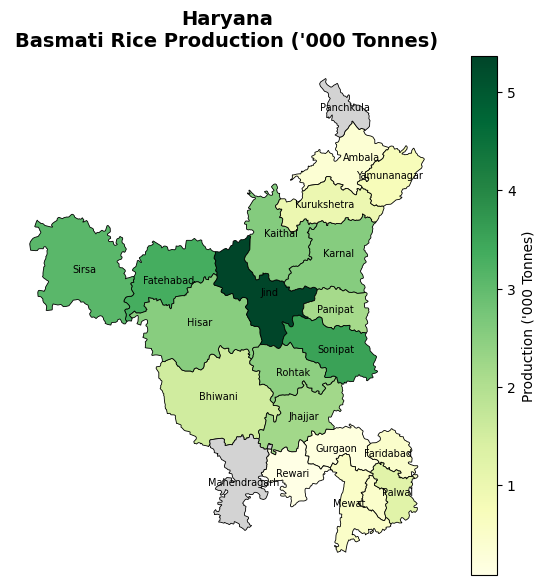

⚠️ No map data for Himachal Pradesh
⚠️ No map data for Jammu & Kashmir


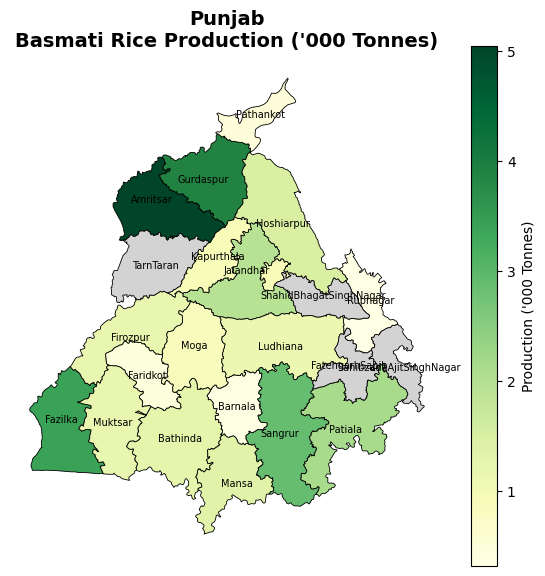

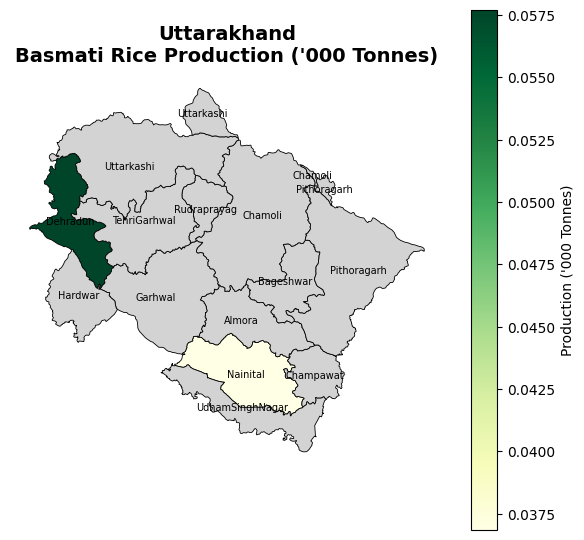

⚠️ No map data for Uttar Pradesh


In [22]:
# ============================================================
# INDIA DISTRICT-LEVEL MAP WITH EXCEL INPUT (FINAL CORRECTED)
# ============================================================

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# ------------------ 1. LOAD EXCEL ------------------
excel_path = "cropping.xlsx"
df = pd.read_excel(excel_path)

df.columns = ["State", "District", "Production"]
df["State"] = df["State"].str.strip()
df["District"] = df["District"].str.strip()

# ------------------ 2. LOAD LATEST DISTRICT MAP ------------------
districts_url = (
    "https://geodata.ucdavis.edu/gadm/gadm4.1/json/"
    "gadm41_IND_2.json"
)

india = gpd.read_file(districts_url)

india = india[["NAME_1", "NAME_2", "geometry"]]
india.rename(
    columns={"NAME_1": "State", "NAME_2": "District"},
    inplace=True
)

india["State"] = india["State"].str.strip()
india["District"] = india["District"].str.strip()

# ------------------ 3. DISTRICT NAME STANDARDIZATION ------------------
district_rename = {
    # Punjab
    "Shahid Bhagat Singh Nagar": "Nawanshahar",
    "Sri Muktsar Sahib": "Muktsar",

    # Uttar Pradesh
    "Budaun": "Badaun",
    "Farrukhabad": "Farukhabad",
    "Shahjahanpur": "Shahjehanpur"
}

india["District"] = india["District"].replace(district_rename)

# ------------------ 4. MERGE EXCEL WITH MAP ------------------
gdf = india.merge(
    df,
    how="left",
    on=["State", "District"]
)

# ------------------ 5. STATES TO PLOT ------------------
states = df["State"].unique()

# ------------------ 6. PLOTTING FUNCTION ------------------
def plot_state(state_name):

    g = gdf[gdf["State"] == state_name]

    if g.empty:
        print(f"⚠️ No map data for {state_name}")
        return

    fig, ax = plt.subplots(figsize=(7, 9))

    g.plot(
        column="Production",
        cmap="YlGn",
        linewidth=0.6,
        edgecolor="black",
        legend=True,
        ax=ax,
        legend_kwds={
            "label": "Production ('000 Tonnes)",
            "shrink": 0.75
        },
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "black",
            "label": "No data"
        }
    )

    # ------------------ DISTRICT LABELS ------------------
    for _, r in g.iterrows():
        if r.geometry is None or r.geometry.is_empty:
            continue

        p = r.geometry.representative_point()

        ax.text(
            p.x,
            p.y,
            r["District"],
            fontsize=7,
            ha="center",
            va="center",
            color="black"
        )

    ax.set_title(
        f"{state_name}\nBasmati Rice Production ('000 Tonnes)",
        fontsize=14,
        weight="bold"
    )

    ax.axis("off")
    plt.show()

# ------------------ 7. RUN FOR ALL STATES ------------------
for s in states:
    plot_state(s)


Saving cropping.xlsx to cropping (20).xlsx
⚠️ Districts still unmatched (check Excel spelling):
           State                 District
180      Haryana             Mahendragarh
183      Haryana                Panchkula
460       Punjab           FatehgarhSahib
470       Punjab                  Muktsar
474       Punjab  SahibzadaAjitSinghNagar
476       Punjab   ShahidBhagatSinghNagar
477       Punjab                TarnTaran
640  Uttarakhand                   Almora
641  Uttarakhand                Bageshwar
642  Uttarakhand                  Chamoli
644  Uttarakhand                Champawat
646  Uttarakhand                  Garhwal
647  Uttarakhand                  Hardwar
649  Uttarakhand              Pithoragarh
651  Uttarakhand              Rudraprayag
652  Uttarakhand             TehriGarhwal
653  Uttarakhand          UdhamSinghNagar
654  Uttarakhand               Uttarkashi


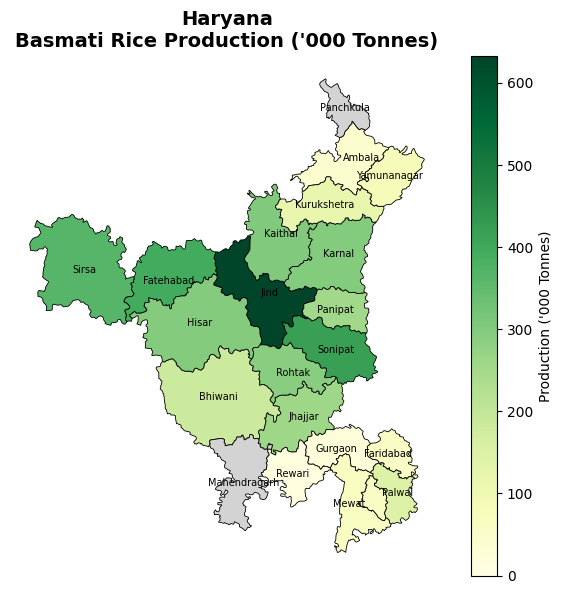

ValueError: aspect must be finite and positive 

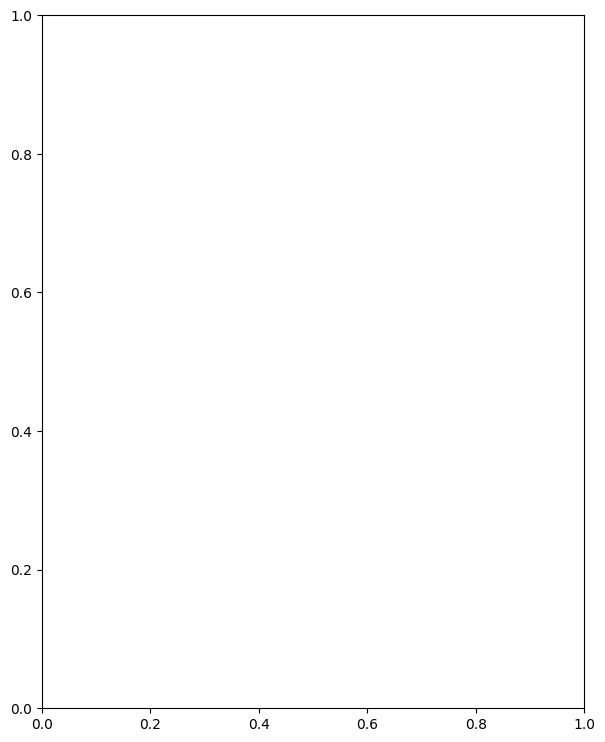

In [24]:
# ============================================================
# DISTRICT-LEVEL BASMATI RICE MAPS (FINAL FIXED VERSION)
# ============================================================

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from google.colab import files

# ------------------ 1. UPLOAD EXCEL ------------------
uploaded = files.upload()
excel_path = list(uploaded.keys())[0]

df = pd.read_excel(excel_path)
df.columns = ["State", "District", "Production"]

df["State"] = df["State"].str.strip()
df["District"] = df["District"].str.strip()

# ------------------ 2. LOAD LATEST DISTRICT MAP ------------------
districts_url = (
    "https://geodata.ucdavis.edu/gadm/gadm4.1/json/"
    "gadm41_IND_2.json"
)

india = gpd.read_file(districts_url)
india = india[["NAME_1", "NAME_2", "geometry"]]
india.rename(
    columns={"NAME_1": "State", "NAME_2": "District"},
    inplace=True
)

india["State"] = india["State"].str.strip()
india["District"] = india["District"].str.strip()

# ------------------ 3. DISTRICT NAME STANDARDIZATION ------------------
rename_map = {
    # Punjab
    "Shahid Bhagat Singh Nagar": "Nawanshahar",
    "Sahibzada Ajit Singh Nagar": "Mohali",
    "Sri Muktsar Sahib": "Muktsar",
    "Tarn Taran": "Taran Taran",

    # Uttar Pradesh
    "Budaun": "Badaun",
    "Farrukhabad": "Farukhabad",
    "Shahjahanpur": "Shahjehanpur"
}

india["District"] = india["District"].replace(rename_map)

# ------------------ 4. MERGE DATA ------------------
gdf = india.merge(
    df,
    how="left",
    on=["State", "District"]
)

# ------------------ 5. DIAGNOSTIC CHECK (IMPORTANT) ------------------
missing = gdf[gdf["Production"].isna() & gdf["State"].isin(df["State"].unique())]

if not missing.empty:
    print("⚠️ Districts still unmatched (check Excel spelling):")
    print(missing[["State", "District"]].drop_duplicates())
else:
    print("✅ All districts matched successfully")

# ------------------ 6. COLOR SCALE ------------------
vmin = 0
vmax = df["Production"].max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)

# ------------------ 7. STATES TO PLOT ------------------
states = df["State"].unique()

# ------------------ 8. PLOTTING FUNCTION ------------------
def plot_state(state_name):

    g = gdf[gdf["State"] == state_name]

    fig, ax = plt.subplots(figsize=(7, 9))

    g.plot(
        column="Production",
        cmap="YlGn",
        linewidth=0.6,
        edgecolor="black",
        legend=True,
        ax=ax,
        norm=norm,
        legend_kwds={
            "label": "Production ('000 Tonnes)",
            "shrink": 0.75
        },
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "black",
            "label": "No data"
        }
    )

    # District labels
    for _, r in g.iterrows():
        if r.geometry is None or r.geometry.is_empty:
            continue
        p = r.geometry.representative_point()
        ax.text(
            p.x, p.y,
            r["District"],
            fontsize=7,
            ha="center",
            va="center"
        )

    ax.set_title(
        f"{state_name}\nBasmati Rice Production ('000 Tonnes)",
        fontsize=14,
        weight="bold"
    )

    ax.axis("off")
    plt.show()

# ------------------ 9. RUN FOR ALL STATES ------------------
for s in states:
    plot_state(s)


Saving cropping.xlsx to cropping (25).xlsx
⚠️ STILL UNMATCHED DISTRICTS (MAP SIDE NAMES):
         State_x        District_x
24  UttarPradesh         Allahabad
25  UttarPradesh     AmbedkarNagar
26  UttarPradesh            Amethi
29  UttarPradesh          Azamgarh
31  UttarPradesh          Bahraich
32  UttarPradesh            Ballia
33  UttarPradesh         Balrampur
34  UttarPradesh             Banda
35  UttarPradesh         Barabanki
37  UttarPradesh             Basti
39  UttarPradesh            Budaun
41  UttarPradesh         Chandauli
42  UttarPradesh        Chitrakoot
43  UttarPradesh            Deoria
46  UttarPradesh          Faizabad
48  UttarPradesh          Fatehpur
52  UttarPradesh          Ghazipur
53  UttarPradesh             Gonda
54  UttarPradesh         Gorakhpur
55  UttarPradesh          Hamirpur
57  UttarPradesh            Hardoi
59  UttarPradesh            Jalaun
60  UttarPradesh           Jaunpur
61  UttarPradesh            Jhansi
63  UttarPradesh       KanpurDehat


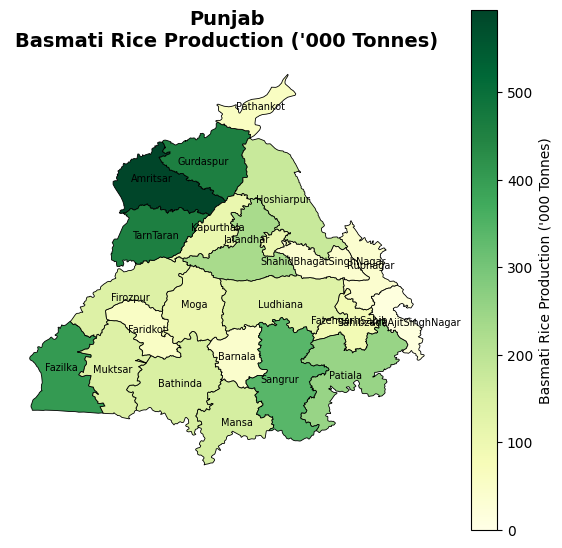

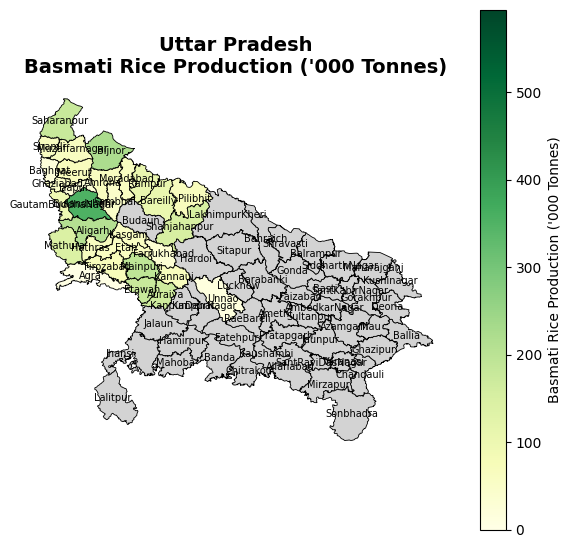

In [29]:
# ============================================================
# FINAL WORKING PROGRAM – PUNJAB & UTTAR PRADESH
# District-level Basmati Rice Production Maps
# ============================================================

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from google.colab import files
import re

# ------------------ 1. UPLOAD EXCEL ------------------
uploaded = files.upload()
excel_path = list(uploaded.keys())[0]

df = pd.read_excel(excel_path)
df.columns = ["State", "District", "Production"]

# ------------------ 2. CLEAN NAME FUNCTION ------------------
def clean_name(x):
    if pd.isna(x):
        return ""
    x = x.lower()
    x = re.sub(r"[.\s]", "", x)  # remove dots & spaces
    return x

df["State_clean"] = df["State"].apply(clean_name)
df["District_clean"] = df["District"].apply(clean_name)

# ------------------ 3. LOAD LATEST GADM DISTRICTS ------------------
districts_url = (
    "https://geodata.ucdavis.edu/gadm/gadm4.1/json/"
    "gadm41_IND_2.json"
)

india = gpd.read_file(districts_url)
india = india[["NAME_1", "NAME_2", "geometry"]]
india.rename(columns={"NAME_1": "State", "NAME_2": "District"}, inplace=True)

india["State_clean"] = india["State"].apply(clean_name)
india["District_clean"] = india["District"].apply(clean_name)

# ------------------ 4. FILTER STATES ------------------
target_states = ["punjab", "uttarpradesh"]

india = india[india["State_clean"].isin(target_states)]
df = df[df["State_clean"].isin(target_states)]

# ------------------ 5. MERGE ------------------
gdf = india.merge(
    df,
    how="left",
    on=["State_clean", "District_clean"]
)

# ------------------ 6. CHECK UNMATCHED DISTRICTS ------------------
missing = gdf[gdf["Production"].isna()]

if not missing.empty:
    print("⚠️ STILL UNMATCHED DISTRICTS (MAP SIDE NAMES):")
    print(missing[["State_x", "District_x"]].drop_duplicates())
else:
    print("✅ ALL DISTRICTS MATCHED SUCCESSFULLY")

# ------------------ 7. COLOR SCALE ------------------
vmax = df["Production"].max()
norm = colors.Normalize(vmin=0, vmax=vmax)

# ------------------ 8. PLOTTING FUNCTION ------------------
def plot_state(state_clean):

    g = gdf[gdf["State_clean"] == state_clean].copy()
    g = g[g.geometry.notnull()]

    fig, ax = plt.subplots(figsize=(7, 9))

    g.plot(
        column="Production",
        cmap="YlGn",
        linewidth=0.6,
        edgecolor="black",
        legend=True,
        norm=norm,
        ax=ax,
        legend_kwds={
            "label": "Basmati Rice Production ('000 Tonnes)",
            "shrink": 0.75
        },
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "black",
            "label": "No data"
        }
    )

    # District labels
    for _, r in g.iterrows():
        p = r.geometry.representative_point()
        ax.text(
            p.x, p.y,
            r["District_x"],
            fontsize=7,
            ha="center",
            va="center"
        )

    title_state = "Uttar Pradesh" if state_clean == "uttarpradesh" else "Punjab"

    ax.set_title(
        f"{title_state}\nBasmati Rice Production ('000 Tonnes)",
        fontsize=14,
        weight="bold"
    )

    ax.set_aspect("equal")
    ax.axis("off")
    plt.show()

# ------------------ 9. RUN ------------------
plot_state("punjab")
plot_state("uttarpradesh")
